# Predictiong the Sale Prices of Bulldozers using Machine Learning

In project i want to use machine learning to try predict prices of the bulldogers. 

## 1. Problem definition  

How close to real prices we can predict the future proce of a bulldoger, using charasteristics and previous examples of how much were they sold for?

## 2. Data
Data downloaded from kaggle: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data
This dataset is 10 years olf but because its so big and proffesional we wil use it.

The data for this competition is split into three parts:

   * Train.csv is the training set, which contains data through the end of 2011.
   * Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
   * Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation 

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

More details: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

In our project by creating a machine learning model we want to minimize RMSLE.

## 4. Features 

Kaggle gives us a data dictionary with all the features of the dataset. 
If you want you can viewe it onmy Google Sheets:
https://docs.google.com/spreadsheets/d/1iZIFYc7r7j5_PTw9DrgPcSXcwpMpyn6XybFFSjrCNJg/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# import training and validation sets
bulldogers_df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                            low_memory=False) #Pandas try use as low memory as possible

In [3]:
bulldogers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

We have very solid dataset for our machine learning project. As we see, we have pretty big holes with missing values. I want to count them and make some visualization

In [4]:
bulldogers_df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
bulldogers_df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

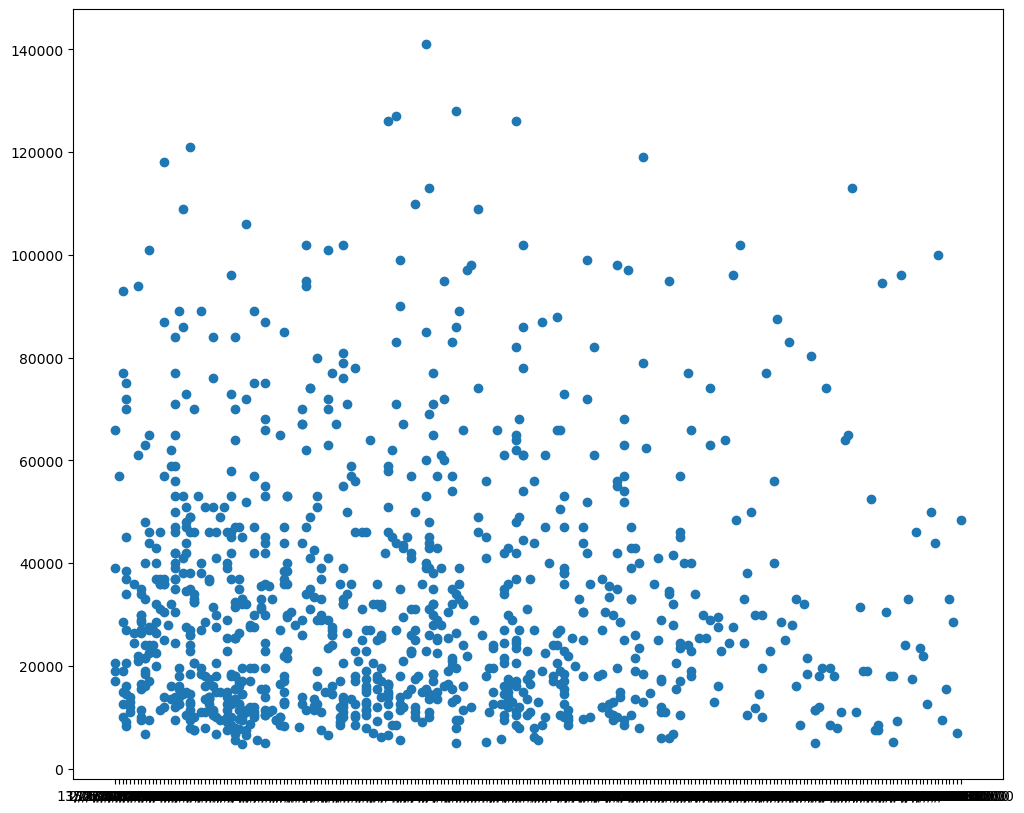

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(bulldogers_df["saledate"][:1000], bulldogers_df["SalePrice"][:1000]);

In [7]:
# dtype object is now what we need, we want to segregate this
bulldogers_df.saledate[:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

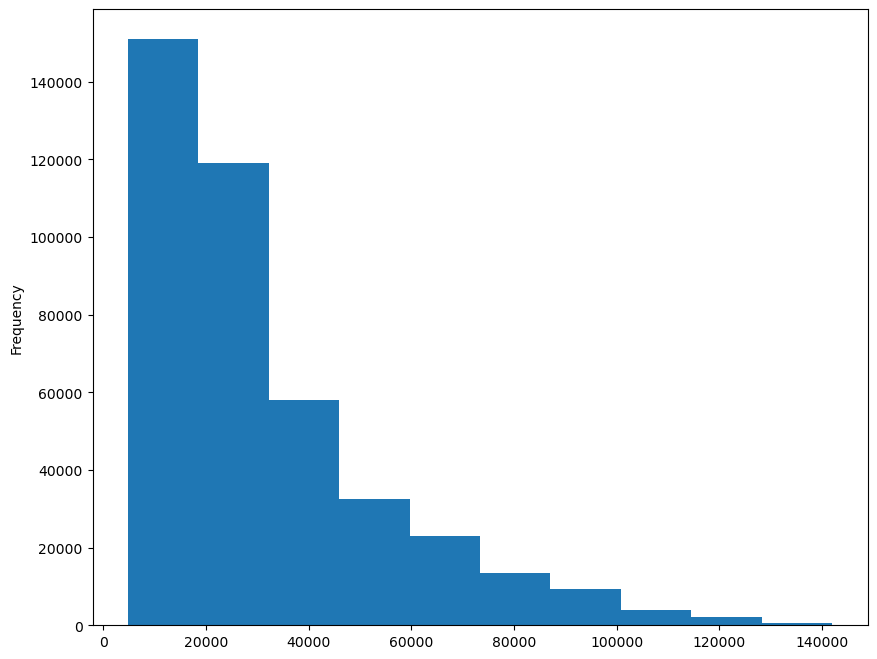

In [8]:
bulldogers_df.SalePrice.plot.hist(figsize=(10, 8));

### Dates changing
I want to make sure, that all dates are in the same format (datetime object)

In [9]:
# Importing data with corrected dates
bulldogers_df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                            low_memory=False,
                            parse_dates=['saledate'])

In [10]:
bulldogers_df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

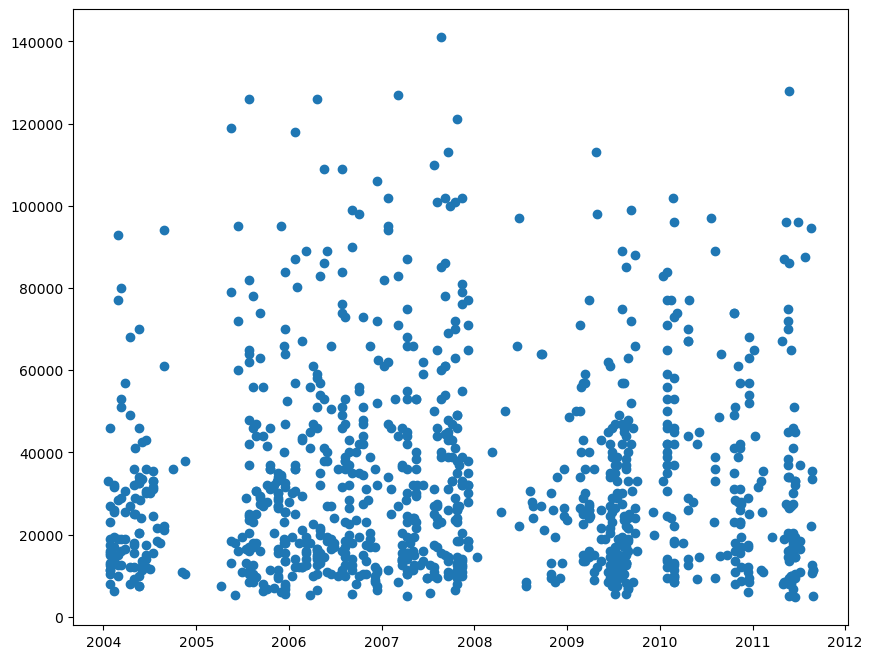

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(bulldogers_df["saledate"][:1000], bulldogers_df["SalePrice"][:1000]);

Now we have some sorted and formated data, its eazier to read and analize

In [12]:
bulldogers_df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sorting our bulldoger DataFrame by saledate 
I think with so big dataset, its eazier to read and work on sorted data.

In [13]:
bulldogers_df.sort_values(by=["saledate"], inplace=True, ascending=True)
bulldogers_df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Copy of  original data
In case doing somthing wrong with data, to don't upload it again I will make a copy of it 

In [14]:
bulldogers_df_copy = bulldogers_df.copy()
bulldogers_df_copy.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Adding datetime parameters
I think good idea if we work with sales and dates, to check whether its a start or end of the month, what year itp. I will try to breake it down.

In [15]:
bulldogers_df_copy[:1].saledate.dt.year, bulldogers_df_copy[:1].saledate.dt.day

(205615    1989
 Name: saledate, dtype: int64,
 205615    17
 Name: saledate, dtype: int64)

In [16]:
bulldogers_df_copy['saleDay']=bulldogers_df_copy.saledate.dt.day
bulldogers_df_copy['saleMonth']=bulldogers_df_copy.saledate.dt.month
bulldogers_df_copy['saleYear']=bulldogers_df_copy.saledate.dt.year
bulldogers_df_copy['saleDayOfWeek']=bulldogers_df_copy.saledate.dt.dayofweek
bulldogers_df_copy['saleDayOfYear']=bulldogers_df_copy.saledate.dt.dayofyear

In [17]:
bulldogers_df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [18]:
# Now we can delete saledate, we dont need it anymore
bulldogers_df_copy.drop("saledate", axis=1, inplace=True)

### Before we start putting something into our null values we need to break out Bulldogers DataFrame into validation and training DataFrame, because we don't want to mix values from this two sets

In [19]:
# Split data into training and validation
bulldogers_val = bulldogers_df_copy[bulldogers_df_copy.saleYear==2012]
bulldogers_train = bulldogers_df_copy[bulldogers_df_copy.saleYear!=2012]

len(bulldogers_val), len(bulldogers_train)

(11573, 401125)

First I want to fill one Dataframe by hand, I will try this with train dataset

### Filling missing numerical values

First i want to fill numeric values.

In [20]:
# looking for numeric values with null values
for label, content in bulldogers_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [21]:
# Filling numeric rows with the median (not mean - mean will be distorted by outliers)
for label, content in bulldogers_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # We want to remember whith data was missing, so i will add bunary column for this
            bulldogers_train[label+'_is_missing']=pd.isnull(content)
            # Filling missing numeric data
            bulldogers_train[label] = content.fillna(content.median())

C:\Users\48691\AppData\Local\Temp\ipykernel_6924\3969006963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulldogers_train[label+'_is_missing']=pd.isnull(content)
C:\Users\48691\AppData\Local\Temp\ipykernel_6924\3969006963.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulldogers_train[label] = content.fillna(content.median())
C:\Users\48691\AppData\Local\Temp\ipykernel_6924\3969006963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [22]:
# Done
print(bulldogers_train.auctioneerID.isna().sum(), bulldogers_train.MachineHoursCurrentMeter.isna().sum())
print(bulldogers_train.auctioneerID_is_missing.value_counts())
print(bulldogers_train.MachineHoursCurrentMeter_is_missing.value_counts())

0 0
False    380989
True      20136
Name: auctioneerID_is_missing, dtype: int64
True     258360
False    142765
Name: MachineHoursCurrentMeter_is_missing, dtype: int64


We have a lot of missing data and we need to change strings into numbers. So now we will take care of changing data into numbers and filling ones missing

In [23]:
bulldogers_train.dtypes, bulldogers_train.isna().sum()

(SalesID                                  int64
 SalePrice                              float64
 MachineID                                int64
 ModelID                                  int64
 datasource                               int64
 auctioneerID                           float64
 YearMade                                 int64
 MachineHoursCurrentMeter               float64
 UsageBand                               object
 fiModelDesc                             object
 fiBaseModel                             object
 fiSecondaryDesc                         object
 fiModelSeries                           object
 fiModelDescriptor                       object
 ProductSize                             object
 fiProductClassDesc                      object
 state                                   object
 ProductGroup                            object
 ProductGroupDesc                        object
 Drive_System                            object
 Enclosure                              

### Converting strings
I want to turn all of our data into numbers. I will use possibilites given us by Pandas 

In [24]:
# Finding columns with strings
for label, content in bulldogers_train.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [25]:
# changing strings values into categioty values and ordering them
for label, content in bulldogers_train.items():
    if pd.api.types.is_string_dtype(content):
        bulldogers_train[label]=content.astype('category').cat.as_ordered() 

C:\Users\48691\AppData\Local\Temp\ipykernel_6924\1245881304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulldogers_train[label]=content.astype('category').cat.as_ordered()
C:\Users\48691\AppData\Local\Temp\ipykernel_6924\1245881304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulldogers_train[label]=content.astype('category').cat.as_ordered()
C:\Users\48691\AppData\Local\Temp\ipykernel_6924\1245881304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

C:\Users\48691\AppData\Local\Temp\ipykernel_6924\1245881304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulldogers_train[label]=content.astype('category').cat.as_ordered()
C:\Users\48691\AppData\Local\Temp\ipykernel_6924\1245881304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulldogers_train[label]=content.astype('category').cat.as_ordered()
C:\Users\48691\AppData\Local\Temp\ipykernel_6924\1245881304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [26]:
bulldogers_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 393123
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              401125 non-null  int64   
 1   SalePrice                            401125 non-null  float64 
 2   MachineID                            401125 non-null  int64   
 3   ModelID                              401125 non-null  int64   
 4   datasource                           401125 non-null  int64   
 5   auctioneerID                         401125 non-null  float64 
 6   YearMade                             401125 non-null  int64   
 7   MachineHoursCurrentMeter             401125 non-null  float64 
 8   UsageBand                            69639 non-null   category
 9   fiModelDesc                          401125 non-null  category
 10  fiBaseModel                          401125 non-null  category


In [27]:
bulldogers_train.state.cat.categories # Now it should take this values as the numbers

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [28]:
bulldogers_train.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
393098    31
400217    31
400302    31
400393    31
393123    31
Length: 401125, dtype: int8

Now, when we use Pandas Categories we can access our data in the form of numbers.

### Filling missing categorical values

Now is time for filling categorical values by changing them into numbers. we will add +1 to every label because null value in Categorical is -1, and we want to get rid of that.1

In [29]:
for label, content in bulldogers_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        # We want to remember whith data was missing, so i will add binary column for this
        bulldogers_train[label+'_is_missing']=pd.isnull(content)
        # Turn categories into numbers and add +1 ( because null value is -1 and we dont want that)
        bulldogers_train[label]=pd.Categorical(content).codes + 1

C:\Users\48691\AppData\Local\Temp\ipykernel_6924\2723527527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulldogers_train[label+'_is_missing']=pd.isnull(content)
C:\Users\48691\AppData\Local\Temp\ipykernel_6924\2723527527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bulldogers_train[label]=pd.Categorical(content).codes + 1
C:\Users\48691\AppData\Local\Temp\ipykernel_6924\2723527527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [30]:
bulldogers_train.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [31]:
#Done, no more null and empty values
bulldogers_train.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Function for making preprocess


In [32]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """   
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # We want to remember whith data was missing, so i will add bunary column for this
                df[label+'_is_missing']=pd.isnull(content)
                # Filling missing numeric data
                df[label] = content.fillna(content.median())
                
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"]=pd.isnull(content)
            # We add =1 to the category code because pandas encodes missing categoiers as -1
            df[label] = pd.Categorical(content).codes+1
    return df

In [33]:
preprocess_data(bulldogers_val)

C:\Users\48691\AppData\Local\Temp\ipykernel_6924\2737955100.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label+'_is_missing']=pd.isnull(content)
C:\Users\48691\AppData\Local\Temp\ipykernel_6924\2737955100.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = content.fillna(content.median())
C:\Users\48691\AppData\Local\Temp\ipykernel_6924\2737955100.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [38]:
bulldogers_val.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

## 5. Modelling 
Now, after some data checking, changing strings into numerical values, and filling null places I want to do some modeling. 

But first lets split our data

In [34]:
# split data into X & y

X_train,y_train = bulldogers_train.drop('SalePrice',axis=1), bulldogers_train.SalePrice
X_val,y_val = bulldogers_val.drop('SalePrice',axis=1), bulldogers_val.SalePrice

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 101), (11573,))

In [35]:
%%time
# Import model
from sklearn.ensemble import RandomForestRegressor

# instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)
# Fit model
model.fit(X_train, y_train)

CPU times: total: 18min 40s
Wall time: 5min 45s


RandomForestRegressor(n_jobs=-1, random_state=42)

In time when our model was learning will be good to have functions for our evaluation (the competition use RMSLE-root mean squared log error), but we will use not only RMSLE, also : 
* R^2 (R-squared)
* MAE (mean absolute error)

In [36]:
# Create evaluation fuction( we will use it many times)(the competition use RMSLE)
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score

#root-mean-squared-log-error
def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create fucntion to evaluate model on a few different levels
def show_scores(model):
    """
    Evaluating model on few different levels (MAE, RMSLE, R^2)
    """
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val, val_preds)}
    return scores

For me, it takes 5 min 30 s and i think its too long, so i want to use reduced data. But first lets check our model

In [37]:
show_scores(model)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [39]:
# We can find how the columns fidder using sets
set(X_train.columns) - set(X_val.columns)

{'auctioneerID_is_missing'}

In [40]:
# manually adjusting X_val to have auctioneerID_is_missing column
X_val["auctioneerID_is_missing"]=False
X_val = X_val.reindex(columns=list(X_train.columns))
X_val.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
405675,4449186,2318824,26964,173,99.0,1996,0.0,0,962,362,...,True,True,True,True,True,False,False,False,True,True
401133,1222855,531393,23926,121,3.0,1000,8145.0,2,23,6,...,True,True,True,True,True,True,True,True,True,True
406076,6258613,1810917,13260,149,99.0,2000,24.0,2,461,170,...,True,True,True,True,True,True,True,True,True,True
409018,6282680,1543404,1830,149,99.0,2004,4373.0,3,14,7,...,False,False,False,False,False,True,True,True,True,True
409026,6282759,1863077,11390,149,99.0,2006,3467.0,3,45,20,...,False,False,False,False,False,True,True,True,True,True


In [41]:
show_scores(model)

{'Training MAE': 1578.668995649735,
 'Valid MAE': 10999.16273567787,
 'Training RMSLE': 0.08425263977972991,
 'Valid RMSLE': 0.4912694342979633,
 'Training R^2': 0.987513566729506,
 'Valid R^2': 0.4918709743415628}

After long proceswsing time this values are not quite good.

I want to tune hyperparameters to find perfect hyperparameters for our model.

In [42]:
# Firstly need to change max_samples value, to make faster tuning
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [43]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time

model.fit(X_train, y_train)

CPU times: total: 41.1 s
Wall time: 11.3 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [44]:
show_scores(model)

{'Training MAE': 5560.192746375819,
 'Valid MAE': 9793.01721938996,
 'Training RMSLE': 0.2577880660782841,
 'Valid RMSLE': 0.3902714906025978,
 'Training R^2': 0.8607386522585015,
 'Valid R^2': 0.6625420781827775}

11s is better for me, now lets tune hyperparameters. I will use `RandomizedSearchCV`

In [53]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [58]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomFrorestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5, 1, "sqrt"],
           "max_samples":[10000]}
# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100, # More iterations longer time, I will use 100
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 8min 41s
Wall time: 21min 35s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [59]:
# Fing the best model hyperparameters
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 80}

In [60]:
#  Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6019.685262188191,
 'Valid MAE': 10407.136875290598,
 'Training RMSLE': 0.2746062723986015,
 'Valid RMSLE': 0.41480267586558145,
 'Training R^2': 0.8391713801559285,
 'Valid R^2': 0.6565711467018356}

### Train a model with the best hyperparametes

**Note:** These were found after 100 iterations of RandomizedSearchCV

In [61]:
%%time
# Most ideal hyperparameters

ideal_model = RandomForestRegressor(n_estimators=20,
                                    min_samples_leaf=1,
                                    min_samples_split=6,
                                    max_features=0.5,
                                    max_depth=80,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 1min 41s
Wall time: 27.6 s


RandomForestRegressor(max_depth=80, max_features=0.5, min_samples_split=6,
                      n_estimators=20, n_jobs=-1, random_state=42)

In [62]:
# Scores for ideal_model(trained on all data)
show_scores(ideal_model)

{'Training MAE': 2188.4591272275525,
 'Valid MAE': 10220.61610623354,
 'Training RMSLE': 0.11266728559761871,
 'Valid RMSLE': 0.4026334802377924,
 'Training R^2': 0.9759777378646547,
 'Valid R^2': 0.6511052056515421}

### Test data
Now we can make predictions on test data 

In [63]:
# import the test data
bulldogers_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                             low_memory=False,
                             parse_dates=["saledate"])

bulldogers_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


First we need to make test data looks same as our training - we nedd to split saledate and fill missing values

In [64]:
def process_data(df):
    """
    Calls preprocess_data function and split saledate.
    """
    df['saleDay']=df.saledate.dt.day
    df['saleMonth']=df.saledate.dt.month
    df['saleYear']=df.saledate.dt.year
    df['saleDayOfWeek']=df.saledate.dt.dayofweek
    df['saleDayOfYear']=df.saledate.dt.dayofyear
    df.drop("saledate", axis=1, inplace=True)
    return preprocess_data(df)


In [65]:
bulldogers_test= process_data(bulldogers_test)

In [66]:
bulldogers_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [67]:
# We can find how the columns fidder using sets
set(X_train.columns) - set(bulldogers_test.columns)

{'auctioneerID_is_missing'}

In [68]:
# manually adjust df_test to have auctioneerID_is_missing column
bulldogers_test["auctioneerID_is_missing"]=False
bulldogers_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally our test data DataFrame has the same features as our training DataFrame, we can make predictions


In [69]:
# make predictions on the test data
bulldogers_test = bulldogers_test.reindex(columns=list(X_train.columns))
test_preds = ideal_model.predict(bulldogers_test)

From https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation We see that if we wanted to make a submission, the data is required to be in a certain format. Namely, a DataFrame containing the SalesID and the predicted SalePrice of the bulldozer.

In [71]:
# Create DataFrame compatible with Kaggle submission requirements
bulldogers_preds = pd.DataFrame()
bulldogers_preds["SalesID"] = bulldogers_test["SalesID"]
bulldogers_preds["SalePrice"] = test_preds
bulldogers_preds



,SalesID,SalePrice
0,1227829,17931.351010
1,1227844,17103.718254
2,1227847,46524.583333
3,1227848,63465.522186
4,1227863,49511.607143
...,...,...
12452,6643171,46738.831169
12453,6643173,13608.660714
12454,6643184,13697.306548
12455,6643186,16840.178571


In [74]:
# Exporting finall values to csv
bulldogers_preds.to_csv("data/bluebook-for-bulldozers/predictions.csv",
            index=False)

## 6. Feature Importance

In [75]:
# Find feature importance of our best model
ideal_model.feature_importances_


array([3.71398399e-02, 2.45173319e-02, 4.51107847e-02, 1.78875052e-03,
       4.34514124e-03, 2.04395041e-01, 3.65994236e-03, 1.44371195e-03,
       4.48504108e-02, 4.91745693e-02, 5.37195918e-02, 4.43147111e-03,
       1.63753677e-02, 1.54085002e-01, 4.34728307e-02, 7.99342513e-03,
       9.02905525e-03, 3.26782004e-03, 3.27049471e-03, 4.95274505e-02,
       5.22632097e-04, 3.68450944e-05, 8.99386183e-04, 1.95919871e-04,
       1.83494846e-03, 2.87820240e-05, 4.27946260e-05, 3.63192351e-04,
       3.97772459e-04, 4.00521403e-03, 4.29889137e-03, 1.40296287e-03,
       6.03975979e-03, 9.50817860e-04, 4.29460588e-04, 4.39747401e-03,
       1.07054100e-03, 1.54325231e-02, 1.49631320e-03, 5.14607716e-03,
       1.18688777e-03, 1.17923732e-03, 3.19294562e-03, 8.61200891e-04,
       5.48795619e-04, 4.47263243e-04, 8.48054637e-05, 1.59669297e-03,
       9.85843049e-04, 2.14521320e-04, 4.25335518e-04, 8.26279102e-03,
       5.13124103e-03, 7.42598913e-02, 4.25370841e-03, 1.23577859e-02,
      

Lets plot this feature importance

In [76]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

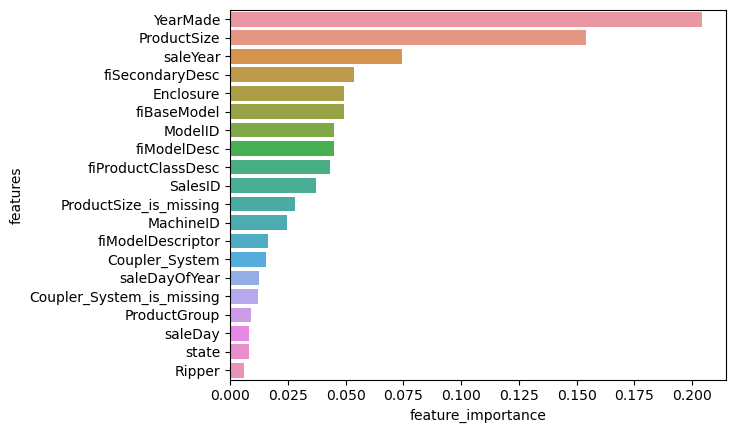

In [77]:
plot_features(X_train.columns, ideal_model.feature_importances_)


In [78]:
sum(ideal_model.feature_importances_)

0.9999999999999998

# End
In this project we create a machine learning model to predicting prices of the bulldogers.
